Even though EDA probably won't change much, it's good to do it to understand the data.

In [16]:
import os
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [17]:
metadata_path = os.path.join('..', 'data', 'HAM10000_metadata.csv')
data = pd.read_csv(metadata_path)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [18]:
data['age'] = data.groupby('sex')['age'].transform(lambda x: x.fillna(x.mean()))

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           10015 non-null  float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [23]:
bins = [_bin for _bin in range(0, 105, 5)]
labels = []

for cnt in range(1, len(bins)):
    labels.append(f'{bins[cnt - 1]}-{bins[cnt]}')

data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)
relevant_data = data[['age_group', 'sex', 'dx']]

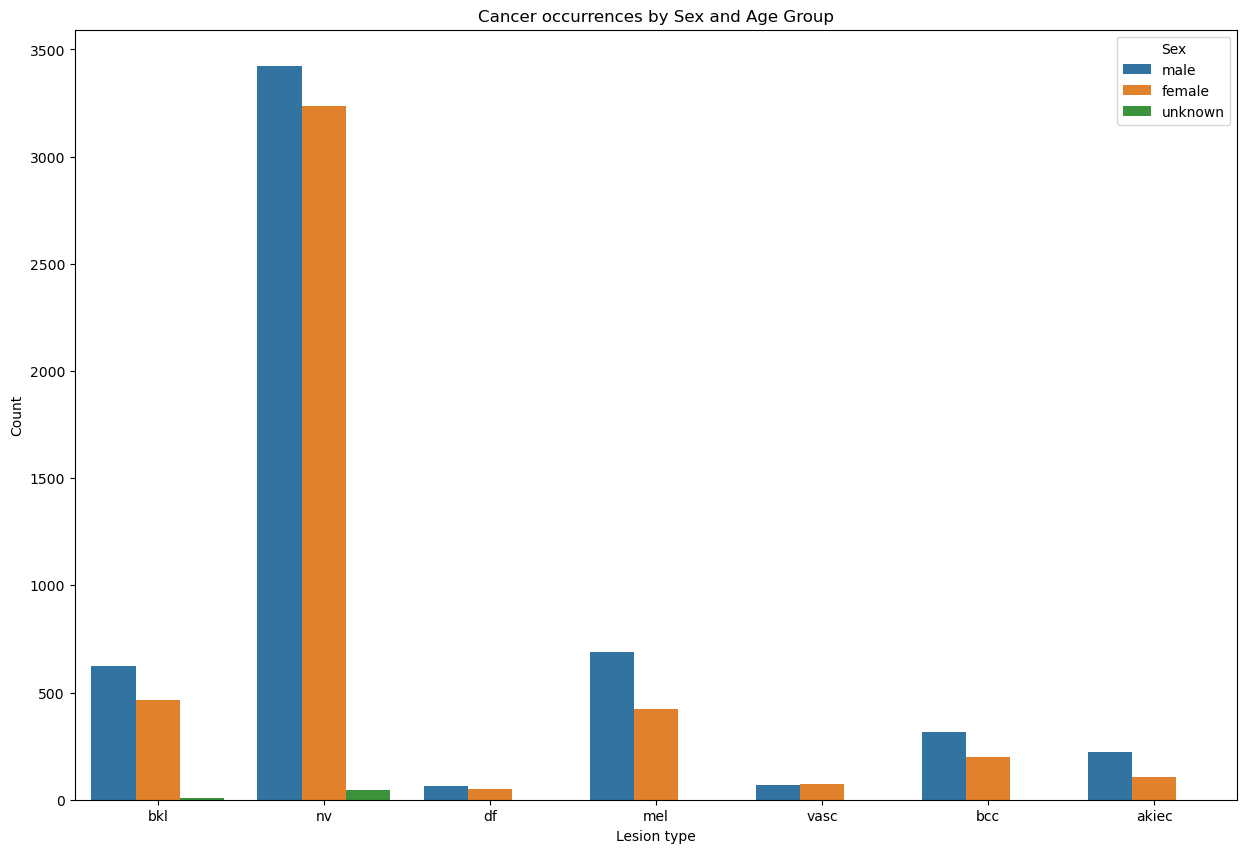

In [26]:
plt.figure(figsize=(15, 10))
sns.countplot(x='dx', hue='sex', data=relevant_data)
plt.title('Cancer occurrences by Sex and Age Group')
plt.xlabel('Lesion type')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

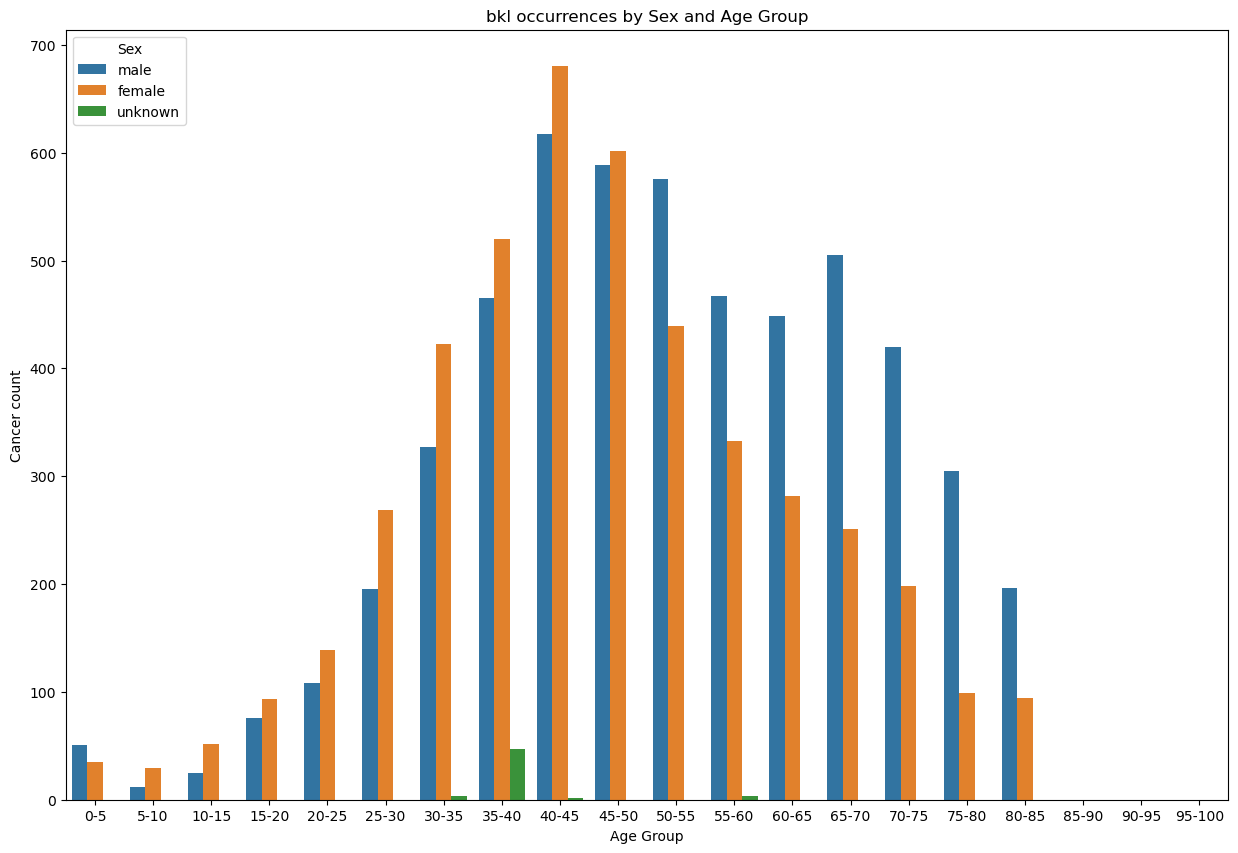

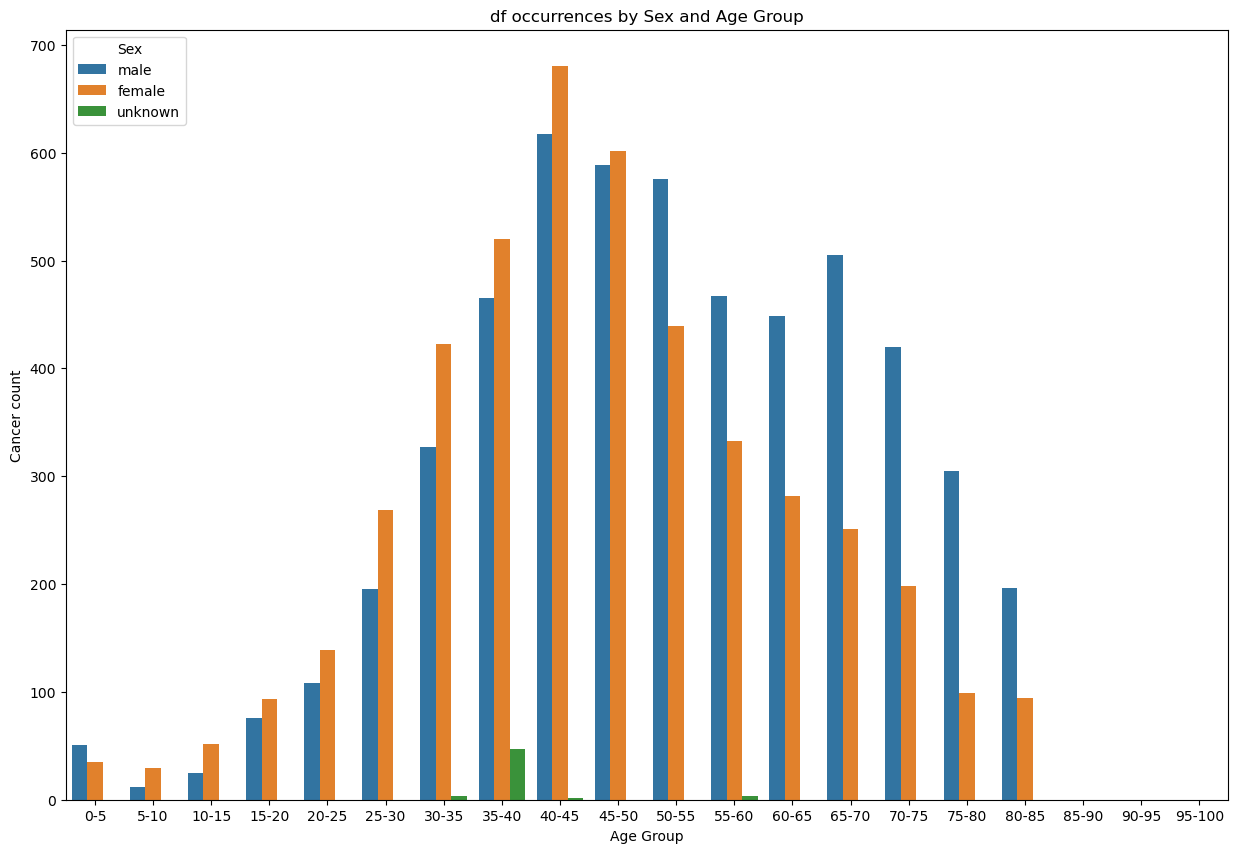

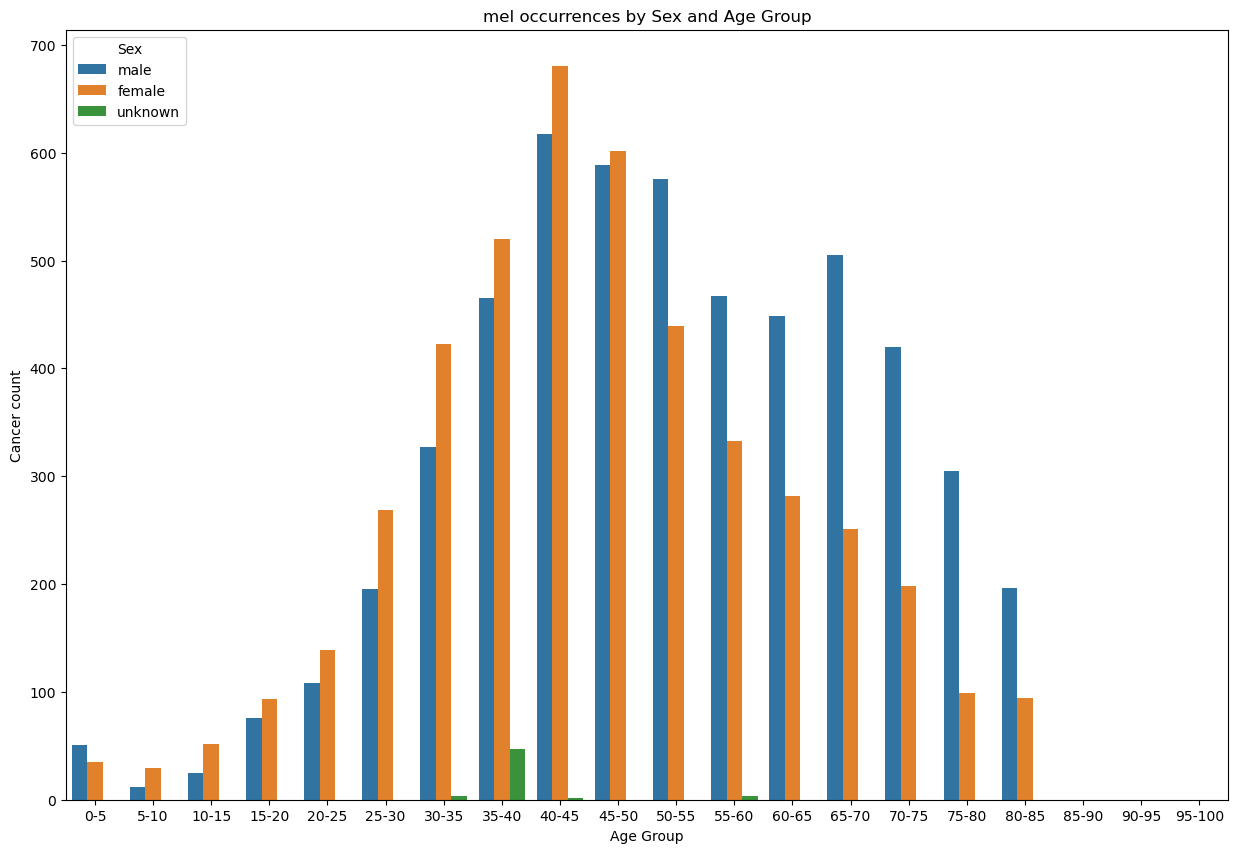

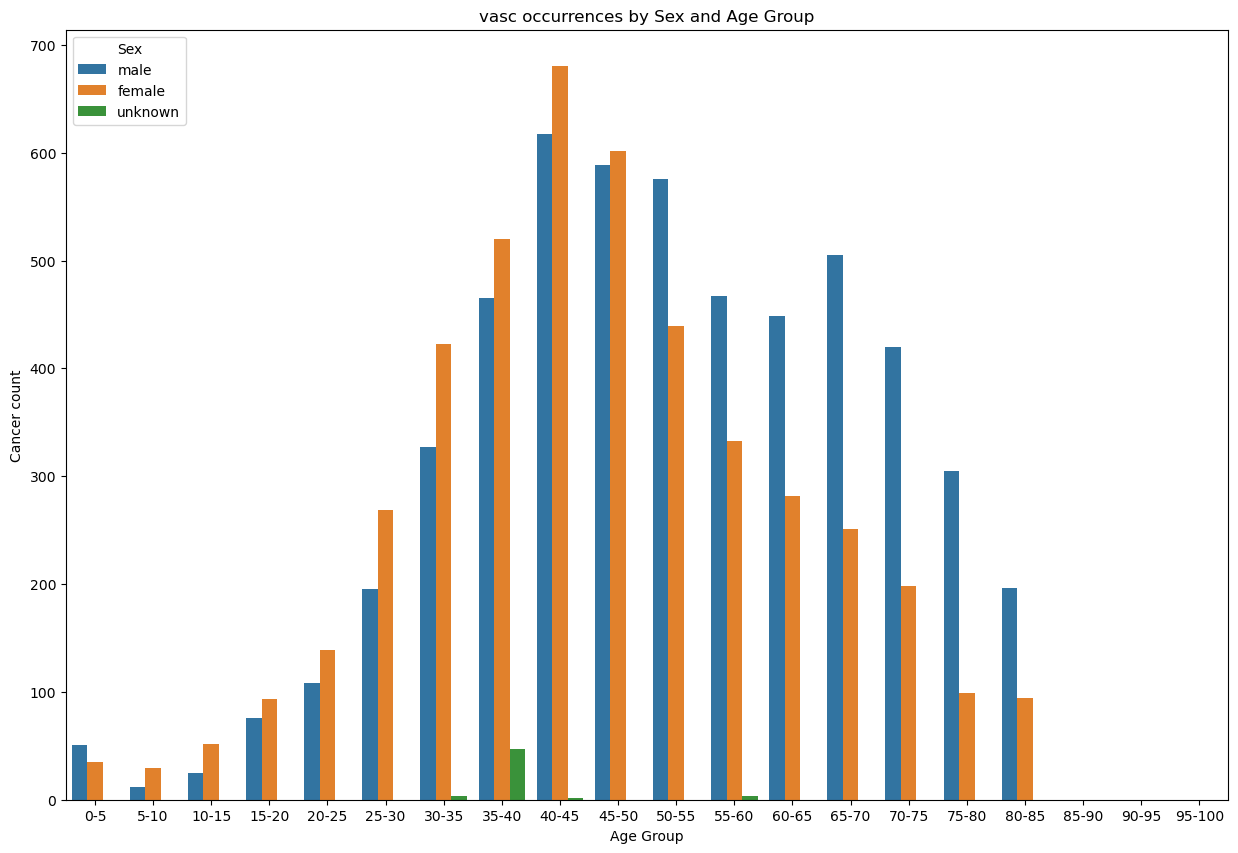

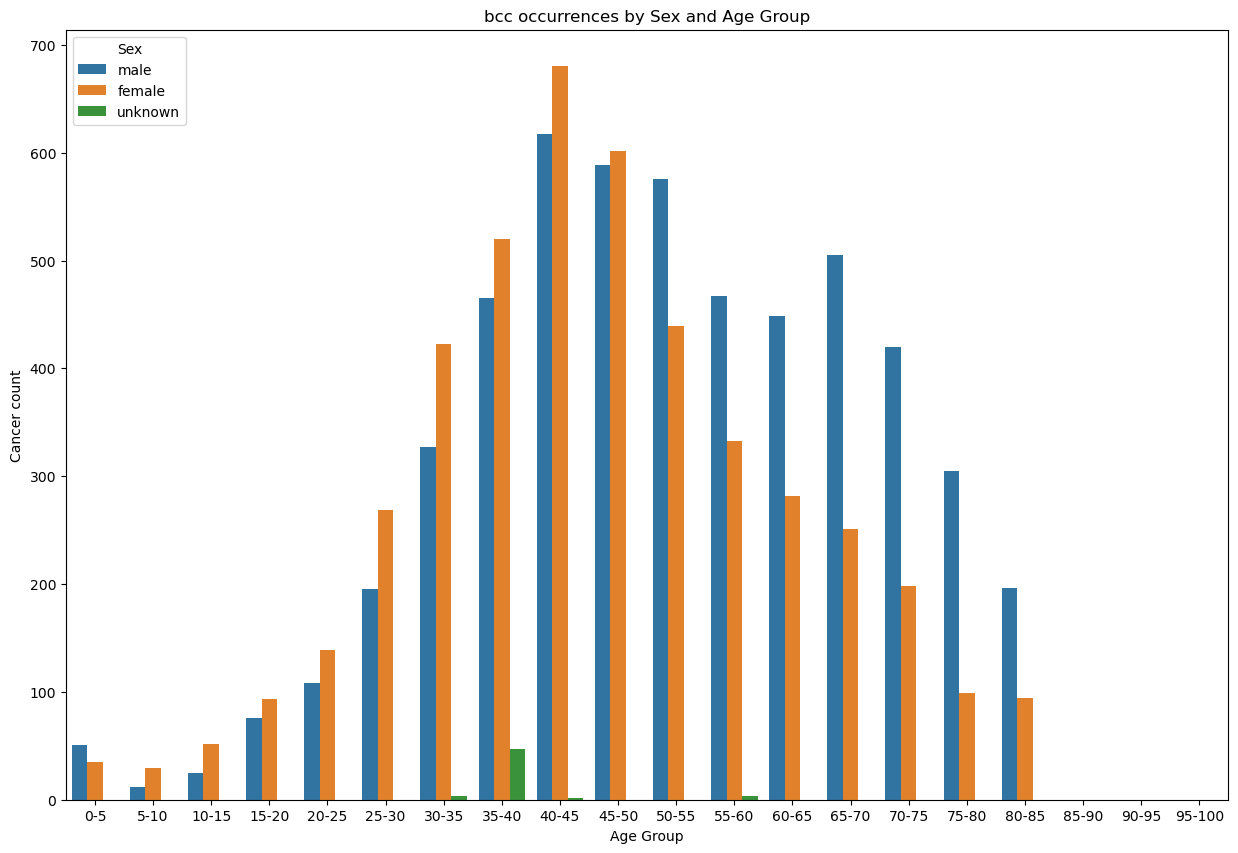

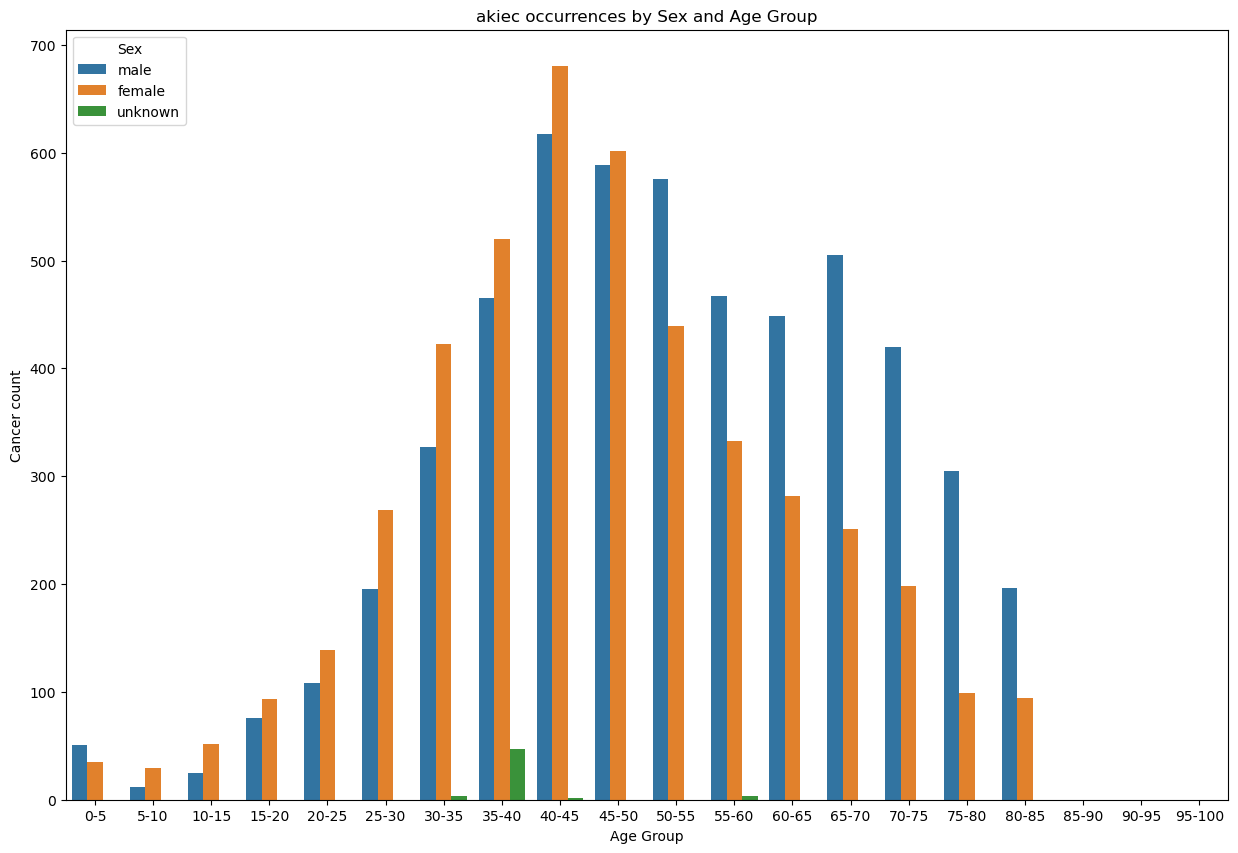

In [29]:
for category in relevant_data['dx'].unique():
    if category == 'nv':
        continue

    plt.figure(figsize=(15, 10))
    sns.countplot(x='age_group', hue='sex', data=relevant_data)
    plt.title(f'{category} occurrences by Sex and Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Cancer count')
    plt.legend(title='Sex')
    plt.show()

From the above plots, it's clear that the data between different lesion categories is proportionally equal between those categories. Now let's also check covariances and be done with EDA.

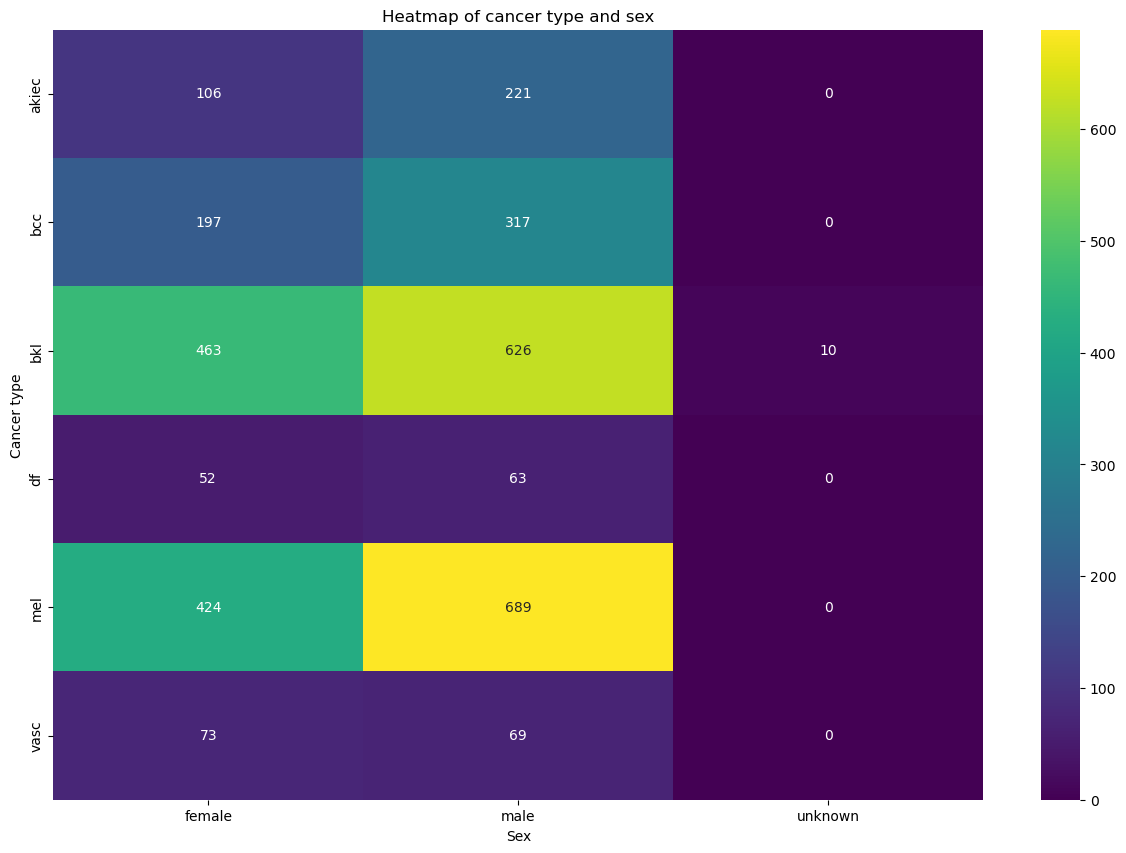

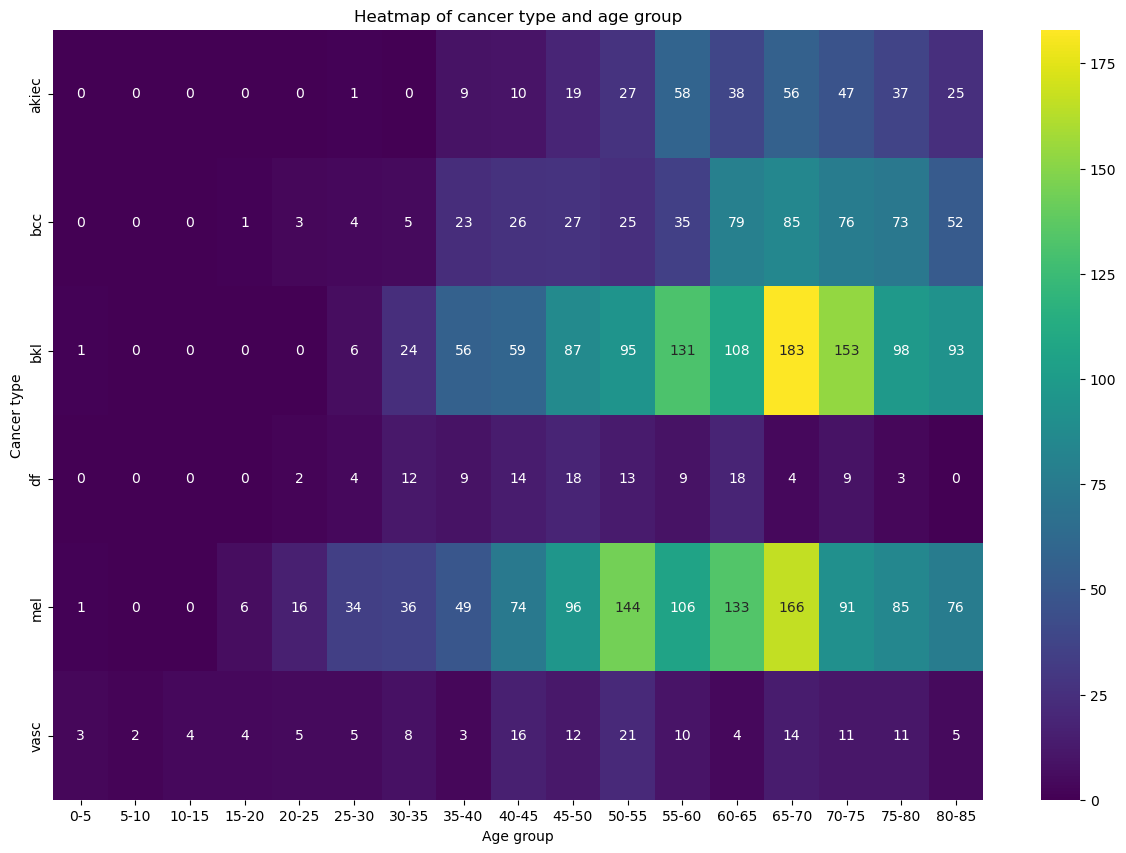

In [37]:
cross_data = relevant_data[relevant_data['dx'] != 'nv']

contingency_table_dx_sex = pd.crosstab(cross_data['dx'], cross_data['sex'])
contingency_table_dx_age_group = pd.crosstab(cross_data['dx'], cross_data['age_group'])

plt.figure(figsize=(15, 10))
sns.heatmap(contingency_table_dx_sex, annot=True, cmap='viridis', fmt='d')
plt.title('Heatmap of cancer type and sex')
plt.xlabel('Sex')
plt.ylabel('Cancer type')
plt.show()

plt.figure(figsize=(15, 10))
sns.heatmap(contingency_table_dx_age_group, annot=True, cmap='viridis', fmt='d')
plt.title('Heatmap of cancer type and age group')
plt.xlabel('Age group')
plt.ylabel('Cancer type')
plt.show()